# Crowd Size Detection - Case Study

In this case study, we explore the task of crowd size detection using a machine learning approach. The primary goal is to train a model to predict the number of people present in an image at a particular place. The dataset comprises images, each labeled with the corresponding crowd size.

## Steps Performed in the Case Study

1. **Data Loading and Exploration:**
   - Load image data and labels from the provided dataset.
   - Explore and visualize random images along with their associated crowd size labels.

2. **Image Preprocessing:**
   - Convert original images to thermal images using a color map.
   - Analyze and compare the histogram distributions of pixel values for both original and thermal images.
   - Resize images to a manageable size (50x50) to reduce the number of features.

3. **Model Training and Evaluation:**
   - Implement Ridge regression to predict crowd sizes.
   - Split the dataset into training and testing sets.
   - Train the model on the training set and evaluate its performance on the testing set.
   - Save the trained model for future use.

4. **Predicting a New Image:**
   - Predict crowd sizes for a new images.
   - Load a new image, preprocess it, and make predictions using the trained model.
   - Print the predicted number of people in the new image.

By following these steps, we aim to develop an efficient crowd size detection model and assess its accuracy on both the training dataset and new images.

Here is all step by step code : 

<font color='navy' size='4'>Step 1: Import Libraries</font>

In [1]:
import numpy as np 
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import cv2

<font color='navy' size='4'>Step 2: Load Data</font>

In [2]:
X = np.load("Crowd\\images.npy")
y = np.load("Crowd\\labels.npy")

In [3]:
X.shape

(2000, 480, 640, 3)

In [4]:
y.shape

(2000, 1)

<font color='navy' size='4'>Step 3: Display Random Images</font>

- Display two random images from the dataset along with the corresponding crowd size labels.

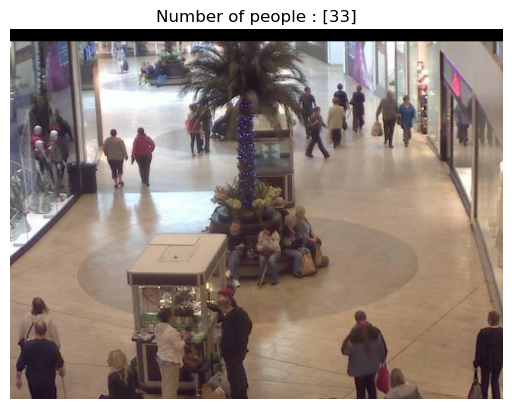

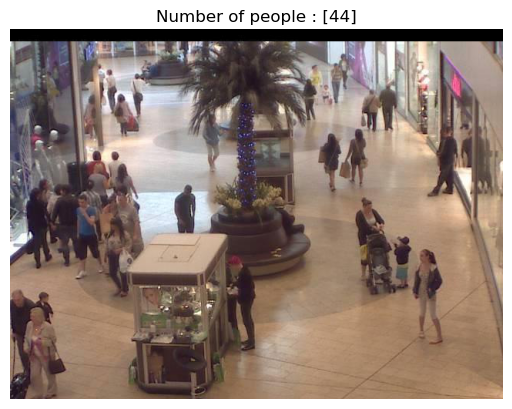

In [5]:
random_numbers = np.random.randint(0, len(X), size=2)

for number in random_numbers:
    # Display images and corresponding labels
    image = X[number]
    plt.imshow(image)
    plt.title(f"Number of people : {y[number]}")
    plt.axis('off')
    plt.show()

<font color='navy' size='4'>Step 4: Convert Images to Thermal Images</font>

- Convert each original image to a thermal image using a color map.

In [6]:
thermal_images = []
for image in X:
    # Apply color map to convert images to thermal representation
    thresh1 = cv2.applyColorMap(image,cv2.COLORMAP_JET)
    thermal_images.append(thresh1)

# Convert the list of thermal images to a NumPy array
thermal_array = np.array(thermal_images)

<font color='navy' size='4'>Step 5: Display Random Thermal Images</font>

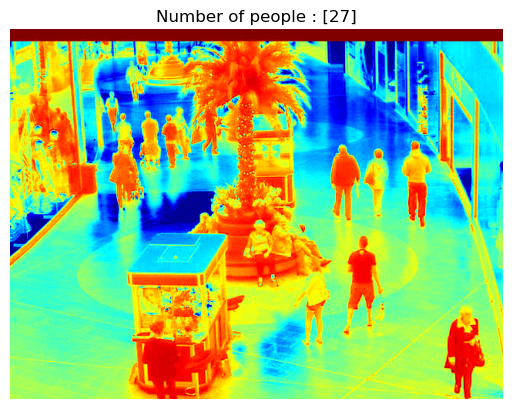

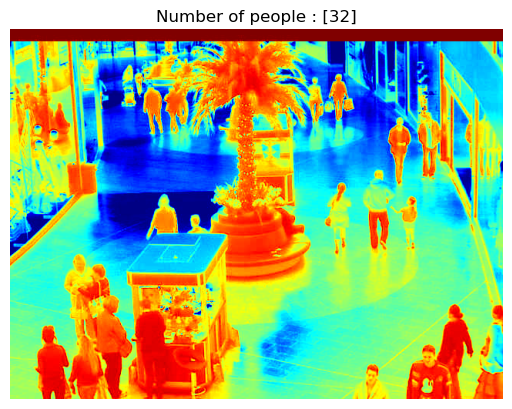

In [7]:
# Generate two random numbers within the range
random_numbers = np.random.randint(0, len(thermal_images), size=2)

for number in random_numbers:
    # Display thermal images and corresponding labels
    image = thermal_images[number]
    plt.imshow(image)
    plt.title(f"Number of people : {y[number]}")
    plt.axis('off')
    plt.show()

<font color='navy' size='4'>Step 6: Histogram Distribution of Images</font>
- Visualize the histogram distribution of pixel values for random images, both for original and thermal images.

In [8]:
def histogram_distribution(images):
    # Plot histogram distribution for six random images
    random_indices = np.random.choice(len(images), size=6, replace=False)

    # Create a subplot grid of 2x3
    fig, axs = plt.subplots(2, 3, figsize=(20, 8))

    # Iterate over the random indices and plot colorful histograms
    for i, index in enumerate(random_indices):
        # Calculate the subplot position
        row = i // 3
        col = i % 3

        # Get the image
        image = images[index]

        # Flatten the image array
        flattened_image = image.ravel()

        # Plot the colorful histogram on the corresponding subplot
        n, bins, patches = axs[row, col].hist(flattened_image, bins=256)
        
        cmap = plt.cm.viridis

        # Normalize the histogram bins to range from 0 to 1
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        bin_width = bins[1] - bins[0]
        normalized_bins = (n - np.min(n)) / (np.max(n) - np.min(n))

        # Assign colors based on the normalized histogram bins
        for c, p in zip(normalized_bins, patches):
            plt.setp(p, 'facecolor', cmap(c))

        axs[row, col].set_title(f'Image {index}')

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()

### Comparing histogram distribution of original images vs thermal images

When looking at how pixels are spread in original and thermal images, an interesting pattern emerges. In original images, pixels are pretty evenly distributed, but in thermal images, there are mainly two dominant pixel types. This makes training a model with thermal images easier because the model can focus more on important pixels, leading to quicker and more accurate training.

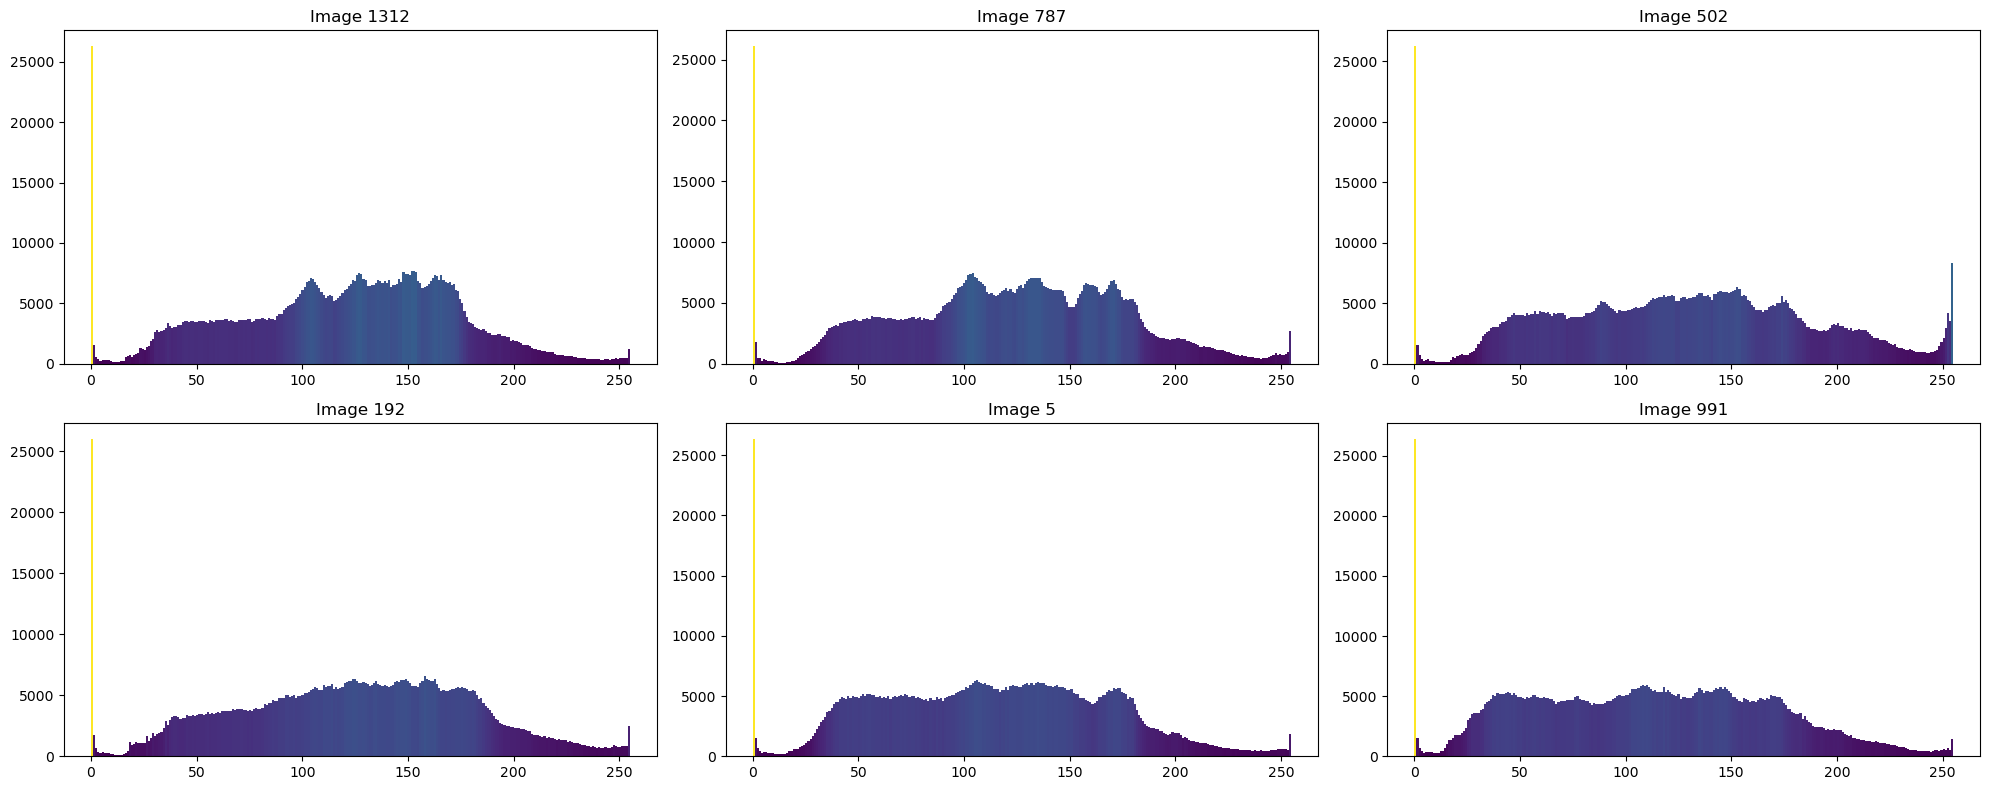

In [9]:
histogram_distribution(X)

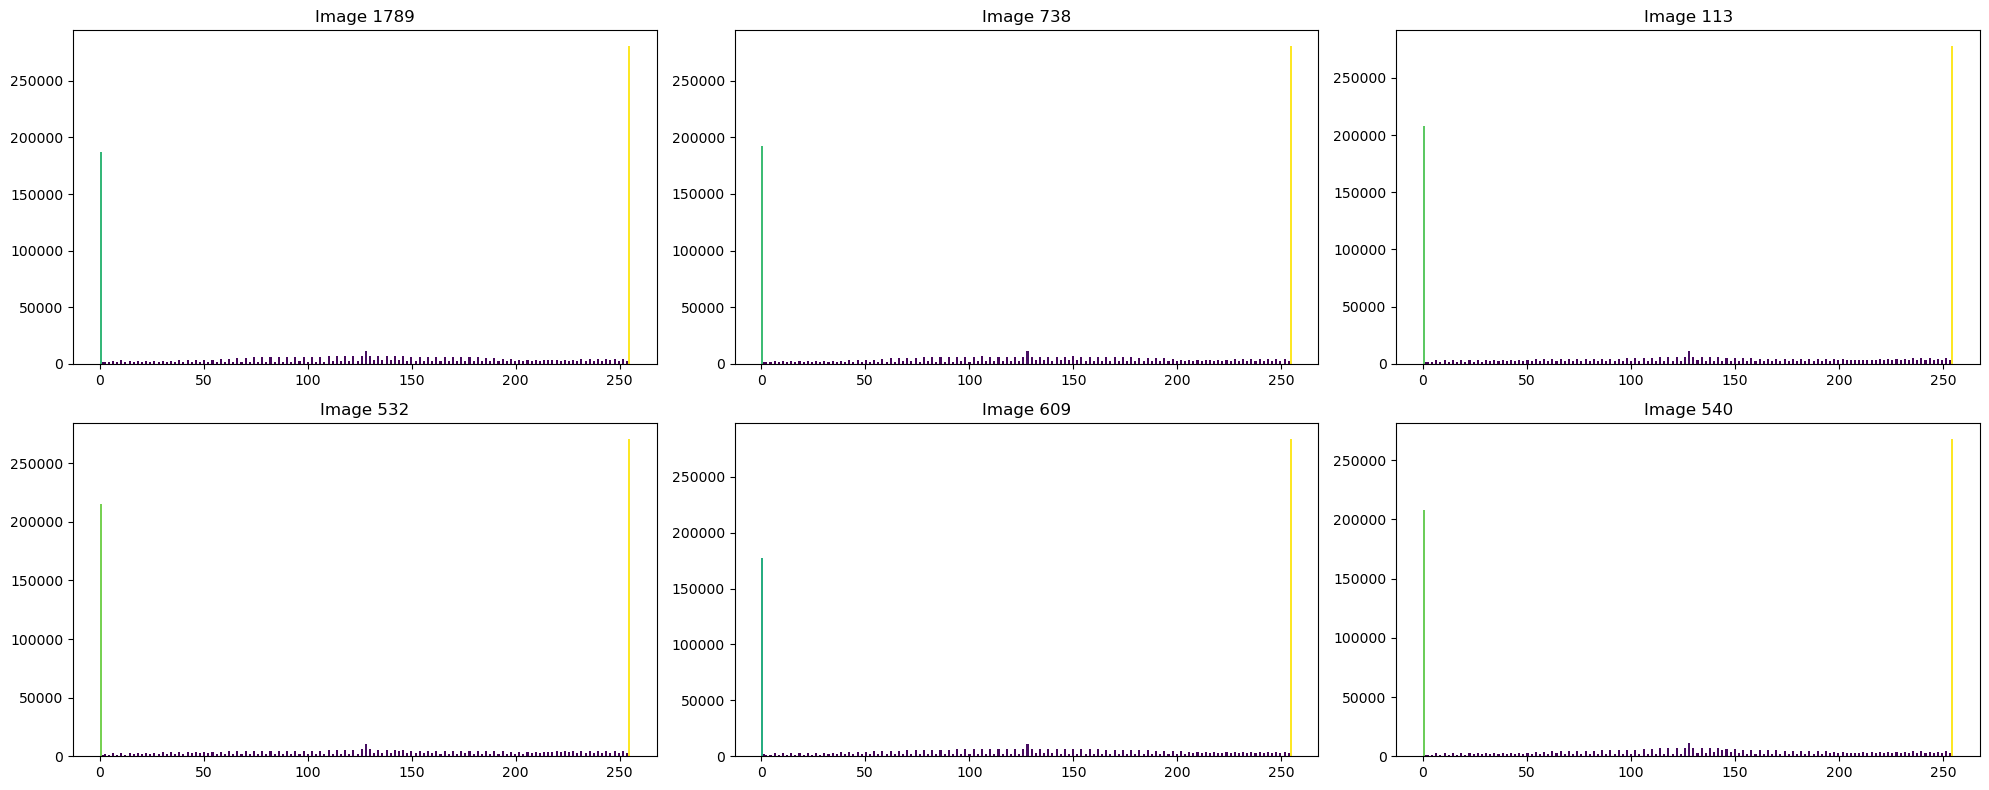

In [10]:
histogram_distribution(thermal_images)

In [11]:
del X

<font color='navy' size='4'>Step 7: Resize Images to 50x50</font>

- Resize thermal images to a smaller size (50x50) to reduce the number of features.

To optimize our image data, we resized it to 50x50x3, striking a balance between information retention and computational efficiency. Initially, the original images were much larger at 640x480x3, and If we were to flatten the images it would be 921600 pixels which is less in comaprison to our training smples that is 2000 approx. This could lead to underfitting or overfitting. Experimenting with 100x100x3 led to confusion for the model, reflected in a negative r2 score. Smaller sizes posed a quality loss dilemma, potentially causing underfitting. The final choice of 50x50x3 was reached through trial and error, emphasizing the need for efficient fine-tuning for potential improvements.

In [12]:
from PIL import Image

new_shape = (50, 50)

# Create an empty list to store the resized images
resized_images = []

# Iterate over the images and resize each one
for i in range(len(thermal_array)):
    # Convert the NumPy array to PIL image object
    image = Image.fromarray((thermal_array[i] * 255).astype(np.uint8))

    # Resize the image using bilinear interpolation
    resized_image = image.resize(new_shape, resample=Image.BILINEAR)

    # Convert the resized image back to NumPy array
    resized_array = np.array(resized_image)

    # Append the resized image to the list
    resized_images.append(resized_array)

# Convert the list of resized images to NumPy array
resized_array = np.array(resized_images)

<font color='navy' size='4'>Step 8: Display 5 Random Resized Images</font>

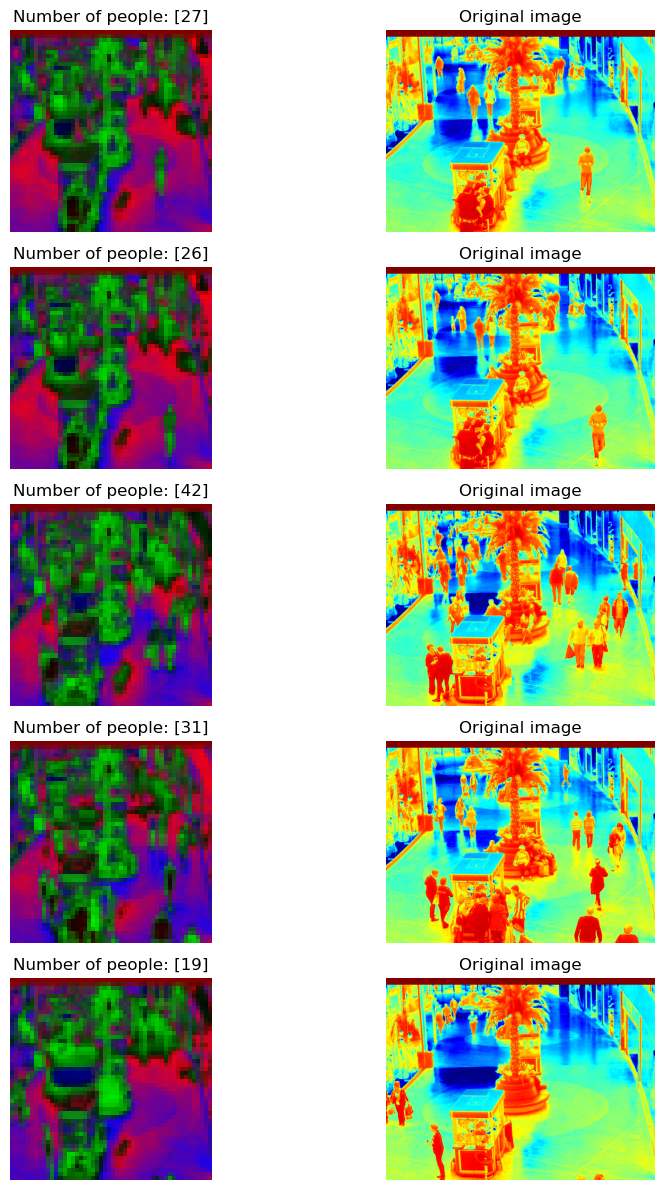

In [13]:
random_numbers = np.random.randint(0, len(resized_array), size=5)

# Create a figure with a 5x2 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 12))

# Display images from resized_array in the first column
for i, number in enumerate(random_numbers):
    image_resized = resized_array[number]
    axes[i, 0].imshow(image_resized)
    axes[i, 0].set_title(f"Number of people: {y[number]}")
    axes[i, 0].axis('off')

# Display images from X (thermal array) in the second column
for i, number in enumerate(random_numbers):
    image_thermal = thermal_array[number]
    axes[i, 1].imshow(image_thermal)
    axes[i, 1].set_title("Original image")
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Display resized and original images
plt.show()


<font color='navy' size='4'>Step 9: Flatten Thermal Images</font>

- Flatten the resized thermal images into a 1D array.

In [14]:
flattened_x = resized_array.reshape(len(thermal_images), -1)

In [15]:
del thermal_images, thermal_array, resized_array

<font color='navy' size='4'>Step 10: Normalize Images</font>

- Normalize the pixel values of the flattened thermal images.

In [16]:
rescale_x = flattened_x/255

<font color='navy' size='4'>Step 11: Train-Test Split</font>

- As our features are high it is good to give more trining samples to our model
- Split the 85% data into training and the 15% data testing sets.

In [17]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rescale_x, y, test_size=0.15, random_state=42)

In [18]:
print(f"X Train shape : {X_train.shape}")
print(f"X Test shape : {X_test.shape}")
print(f"Y Train shape : {y_train.shape}")
print(f"Y test shape : {y_test.shape}")

X Train shape : (1700, 7500)
X Test shape : (300, 7500)
Y Train shape : (1700, 1)
Y test shape : (300, 1)


<font color='navy' size='4'>Step 12: Ridge Regression</font>

- Train a Ridge regression model with specified hyperparameters.

- Two important hyperparameters are: (1) alpha which is a regularization parameter, again increasing the alpha values results in poor results and lowering it causes underfitting and it is the optimal value. (2) max_iter is how many times do we want our model to run, this can be chosen by experimenting with different values, if after one point if the results saturate, it means we have got the optimal iterations

In [19]:
reg = Ridge(alpha=0.2,max_iter = 300)

reg.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

<font color='navy' size='4'>Step 13: Evaluate Model</font>

In [20]:
# Calculate the metrics for the training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_ev = explained_variance_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_ev = explained_variance_score(y_test, y_test_pred)

# Print the metrics for the training and testing sets
print("Training set metrics:")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R-squared: {train_r2:.2f}")
print(f"Explained Variance: {train_ev:.2f}")

print("\n\nTesting set metrics:")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R-squared: {test_r2:.2f}")
print(f"Explained Variance: {test_ev:.2f}")

Training set metrics:
MSE: 0.01
RMSE: 0.08
MAE: 0.06
R-squared: 1.00
Explained Variance: 1.00


Testing set metrics:
MSE: 6.37
RMSE: 2.52
MAE: 1.96
R-squared: 0.86
Explained Variance: 0.86


<font color='navy' size='4'>Step 14: Save the Model</font>

- Save the trained model using joblib.

In [21]:
import joblib

joblib.dump(reg, 'Crowd_size_detection.joblib')

['Crowd_size_detection.joblib']

<font color='navy' size='4'>Step 15: Printing actual and predicted values for 10 images</font>

In [22]:
for i in range(0,len(X_test)):
    if i <= 10:
        print(f"Predicted value : {int(reg.predict(X_test[i].reshape(1,-1)))}")
        print(f"Actual Value : {int(y_test[i])}",end = "\n\n")

Predicted value : 35
Actual Value : 30

Predicted value : 34
Actual Value : 34

Predicted value : 40
Actual Value : 45

Predicted value : 39
Actual Value : 42

Predicted value : 28
Actual Value : 25

Predicted value : 31
Actual Value : 33

Predicted value : 31
Actual Value : 31

Predicted value : 42
Actual Value : 44

Predicted value : 29
Actual Value : 27

Predicted value : 39
Actual Value : 36

Predicted value : 27
Actual Value : 23



<font color='navy' size='4'>Step 15: Visualize actual and predicted values</font>

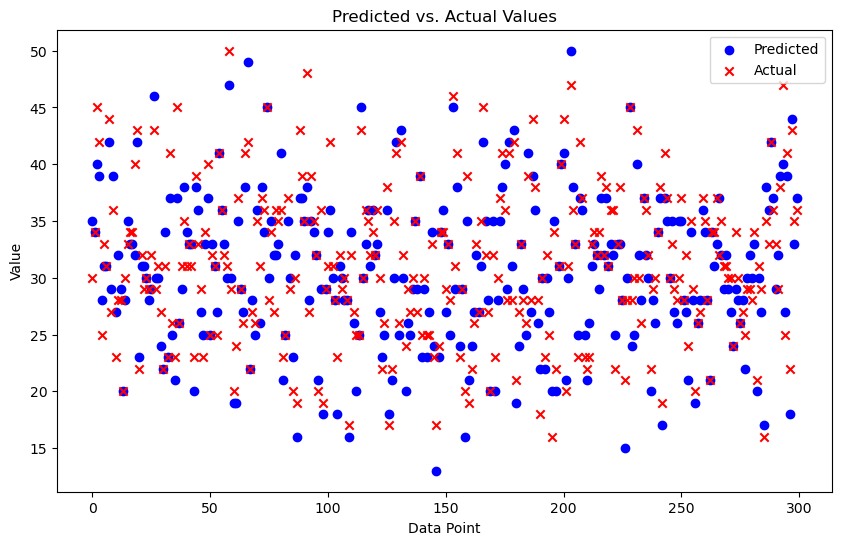

In [23]:
import matplotlib.pyplot as plt

# Lists to store predicted and actual values
predicted_values = []
actual_values = []

for i in range(0, len(X_test)):
    predicted = int(reg.predict(X_test[i].reshape(1, -1)))
    actual = int(y_test[i])

    predicted_values.append(predicted)
    actual_values.append(actual)

# Create a scatter plot to visualize the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(X_test)), predicted_values, label='Predicted', color='blue', marker='o')
plt.scatter(range(len(X_test)), actual_values, label='Actual', color='red', marker='x')

plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

<center><font color='Black' size='6'>Counting people in a New Image</font></center>

<font color='navy' size='4'>Step 1: Import Libraries</font>

In [24]:
import numpy as np
import cv2
import joblib
import matplotlib.pyplot as plt
from PIL import Image

<font color='navy' size='4'>Step 2: Specify the Path and Load the Image</font>

In [25]:
new_image_path = 'Crowd\\frames\\seq_000522.jpg'
new_image = cv2.imread(new_image_path)

<font color='navy' size='4'>Step 3: Load the Trained Ridge Regression Model</font>

In [26]:
reg = joblib.load('Crowd_size_detection.joblib')

<font color='navy' size='4'>Step 4: Convert New Images to Thermal Images</font>

In [27]:
new_thermal_image = cv2.applyColorMap(new_image,cv2.COLORMAP_JET)

<font color='navy' size='4'>Step 5: Convert Image to PIL Image</font>

In [28]:
from PIL import Image

new_PIL_image = Image.fromarray((new_thermal_image * 255).astype(np.uint8))

<font color='navy' size='4'>Step 6: Resize the Image</font>

In [29]:
# Specify the desired new shape for resizing
new_shape = (50, 50)

# Resize the image using bilinear interpolation
new_resized_image = new_PIL_image.resize(new_shape, resample=Image.BILINEAR)

<font color='navy' size='4'>Step 7: Flatten the Resized Image</font>

In [30]:
# Flatten the resized image to prepare for prediction
new_flattened_image = np.array(new_resized_image).reshape(1,-1)

<font color='navy' size='4'>Step 8: Normalize the Flattened Image</font>

In [31]:
# Normalize the flattened image
new_rescaled_image = new_flattened_image / 255

<font color='navy' size='4'>Step 9: Predict the Number of People</font>

In [32]:
# Predict the number of people using the trained model
number_of_people = int(reg.predict(new_rescaled_image)[0])

<font color='navy' size='4'>Step 10: Print and display the Predicted Number of People</font>

In [33]:
# Print the predicted number of people
print(f"Predicted number of people: {number_of_people}")

Predicted number of people: 26


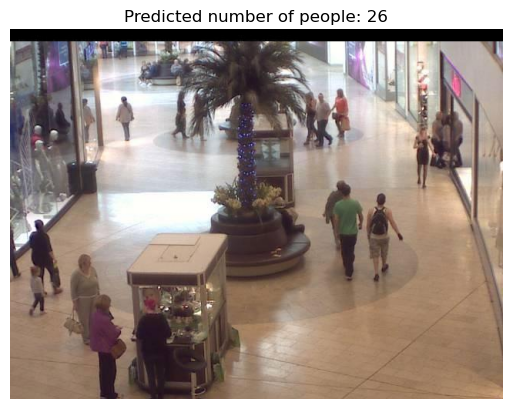

In [34]:
# Display the original image
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted number of people: {number_of_people}")
plt.axis('off')
plt.show()